<a href="https://colab.research.google.com/github/Anusarakh/thesis/blob/main/2_Mar_24_FV_ML_RF_PAPER_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1️⃣ เชื่อม google drive

In [1]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/gdrive/MyDrive/Thesis/song/')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/gdrive/MyDrive/Thesis/song


 2️⃣ Data preparation by FV

In [3]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
import scipy.io.wavfile as wav

In [4]:
classes_1 = 1 #เพลงแนะนำ
classes_0 = 0 #เพลงไม่แนะนำ

path_1 = '/content/gdrive/MyDrive/Thesis/song/Normallcase/fortherapyfinall/'
path_0 = '/content/gdrive/MyDrive/Thesis/song/Normallcase/nontherapyfinall/'



In [ ]:
# tempo = librosa.feature.tempo(y=x, sr=44100 , hop_length=256)
# df_tempo = pd.DataFrame(tempo)

In [ ]:
# tempo[0]

In [5]:
x_list = os.listdir(path_0)
mfcc_mean_0 = []
mfcc_var_0 = []
spec_cen_mean_0 = []
spec_cen_var_0 = []
spec_band_mean_0 = []
spec_band_var_0 = []
zcr_mean_0 = []
zcr_var_0 = []
tempo = []
classes_0_ = []
tempo_0 = []
for i in x_list:
  x , sr = librosa.load(path_0+i, sr=44100)
  #สกัด MFCC
  mfcc = librosa.feature.mfcc(y=x, sr=44100 ,n_mfcc= 20, n_fft = 512,  hop_length=256 )
  df_mfcc = pd.DataFrame(mfcc)
  mfcc_mean = df_mfcc.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล MFCC
  #mfcc_var= df_mfcc.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล MFCC
  #สกัด spectral_centroid
  spec_cen = librosa.feature.spectral_centroid(y=x, sr=44100, S=None, n_fft=512, hop_length=256)
  df_spec_cen = pd.DataFrame(spec_cen)
  spec_cen_mean = df_spec_cen.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล spectral_centroid
  #spec_cen_var= df_spec_cen.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล spectral_centroid
  #สกัด spectral_bandwidth
  spec_band = librosa.feature.spectral_bandwidth(y=x, sr=44100, S=None, n_fft=512, hop_length=256)
  df_spec_band = pd.DataFrame(spec_band)
  spec_band_mean = df_spec_band.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล spectral_bandwidth
  #spec_band_var= df_spec_band.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล spectral_bandwidth
  #สกัด zero_crossing_rate
  zcr = librosa.feature.zero_crossing_rate(y=x, frame_length=512, hop_length=256)
  df_zcr = pd.DataFrame(zcr)
  zcr_mean = df_zcr.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล zero_crossing_rate
  #zcr_var= df_zcr.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล zero_crossing_rate
  #สกัด tempo
  tempo = librosa.feature.tempo(y=x, sr=44100 , hop_length=256)

  mfcc_mean_0.append(list(mfcc_mean))
  #mfcc_var_0.append(list(mfcc_var))
  spec_cen_mean_0.append(spec_cen_mean[0])
  #spec_cen_var_0.append(spec_cen_var[0])
  spec_band_mean_0.append(spec_band_mean[0])
  #spec_band_var_0.append(spec_band_var[0])
  zcr_mean_0.append(zcr_mean[0])
  #zcr_var_0.append(zcr_var[0])
  tempo_0.append(tempo[0])

  classes_0_.append(path_0+i)

/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
<ipython-input-5-1d6355dfcbaa>:14: UserWarning: PySoundFile failed. Trying audioread instead.
  x , sr = librosa.load(path_0+i, sr=44100)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwa

In [6]:
x_list = os.listdir(path_1)
mfcc_mean_1 = []
#mfcc_var_1 = []
spec_cen_mean_1 = []
#spec_cen_var_1 = []
spec_band_mean_1 = []
#spec_band_var_1 = []
zcr_mean_1 = []
#zcr_var_1 = []
tempo = []
classes_1_ = []
tempo_1 = []
for i in x_list:
  x , sr = librosa.load(path_1+i, sr=44100)
  #สกัด MFCC
  mfcc = librosa.feature.mfcc(y=x, sr=44100 ,n_mfcc= 20, n_fft = 512,  hop_length=256 )
  df_mfcc = pd.DataFrame(mfcc)
  mfcc_mean = df_mfcc.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล MFCC
  #mfcc_var= df_mfcc.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล MFCC
  #สกัด spectral_centroid
  spec_cen = librosa.feature.spectral_centroid(y=x, sr=44100, S=None, n_fft=512, hop_length=256)
  df_spec_cen = pd.DataFrame(spec_cen)
  spec_cen_mean = df_spec_cen.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล spectral_centroid
  #spec_cen_var= df_spec_cen.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล spectral_centroid
  #สกัด spectral_bandwidth
  spec_band = librosa.feature.spectral_bandwidth(y=x, sr=44100, S=None, n_fft=512, hop_length=256)
  df_spec_band = pd.DataFrame(spec_band)
  spec_band_mean = df_spec_band.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล spectral_bandwidth
  #spec_band_var= df_spec_band.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล spectral_bandwidth
  #สกัด zero_crossing_rate
  zcr = librosa.feature.zero_crossing_rate(y=x, frame_length=512, hop_length=256)
  df_zcr = pd.DataFrame(zcr)
  zcr_mean = df_zcr.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล zero_crossing_rate
  #zcr_var= df_zcr.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล zero_crossing_rate
  #สกัด tempo
  tempo = librosa.feature.tempo(y=x, sr=44100, hop_length=256)


  mfcc_mean_1.append(list(mfcc_mean))
  #mfcc_var_1.append(list(mfcc_var))
  spec_cen_mean_1.append(spec_cen_mean[0])
  #spec_cen_var_1.append(spec_cen_var[0])
  spec_band_mean_1.append(spec_band_mean[0])
  #spec_band_var_1.append(spec_band_var[0])
  zcr_mean_1.append(zcr_mean[0])
  #zcr_var_1.append(zcr_var[0])
  tempo_1.append(tempo[0])

  classes_1_.append(path_1+i)

In [7]:
mfcc_mean_0 = np.array(mfcc_mean_0)
mfcc_mean_1 = np.array(mfcc_mean_1)

mfcc_mean_df = pd.DataFrame(data = mfcc_mean_0)
mfcc_mean_df['spec'] = spec_cen_mean_0
mfcc_mean_df['specband'] = spec_band_mean_0
mfcc_mean_df['zero'] = zcr_mean_0
mfcc_mean_df['tempo'] = tempo_0
mfcc_mean_df['y'] = 0
mfcc_mean_df['path'] = classes_0_

mfcc_mean_df_1 = pd.DataFrame(data = mfcc_mean_1)
mfcc_mean_df_1['spec'] = spec_cen_mean_1
mfcc_mean_df_1['specband'] = spec_band_mean_1
mfcc_mean_df_1['zero'] = zcr_mean_1
mfcc_mean_df_1['tempo'] = tempo_1
mfcc_mean_df_1['y'] = 1
mfcc_mean_df_1['path'] = classes_1_

df_mean = mfcc_mean_df.append(mfcc_mean_df_1)

print(df_mean.shape)
df_mean.head(10)

(82, 26)


<ipython-input-7-138a8d305978>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mean = mfcc_mean_df.append(mfcc_mean_df_1)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,spec,specband,zero,tempo,y,path
0,-337.519196,87.713432,-53.715721,24.611067,-2.806135,30.887583,-7.148528,8.066414,-10.892271,-6.455784,...,1.112836,0.827766,1.159201,-3.363875,2416.442970,2967.178980,0.054564,88.341346,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
1,-278.316895,78.383743,-54.988056,24.794113,-16.298620,29.786844,-15.504882,17.004032,-17.566490,-2.575557,...,-1.479412,-2.492936,4.362127,-2.547994,2928.497072,3564.770500,0.064016,149.796196,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
2,-350.177734,87.633232,-35.294605,15.607519,-20.191923,27.530233,-16.834919,12.593234,-14.815981,-6.088560,...,4.112645,-1.948760,3.774892,-3.367366,2605.486756,3336.664234,0.057736,94.825115,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
3,-320.999725,83.712631,-79.178917,33.140160,-3.795424,35.310833,-3.274970,9.303452,-10.393191,-0.385238,...,-2.097873,-1.944651,4.207465,-0.871529,2567.362198,3006.088398,0.057116,117.453835,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
4,-311.984467,96.372902,-52.377079,18.820795,-19.120331,31.577271,-6.311707,6.418894,-17.262781,-5.944652,...,1.359192,-5.059598,3.112498,0.699753,2277.861900,2994.578379,0.051328,154.267724,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
5,-302.293304,89.938728,-60.427666,23.944963,-14.811763,34.267166,-11.520166,7.816846,-12.442970,-4.660616,...,-0.353573,-2.197228,2.728648,-1.200106,2545.729320,3034.276899,0.060034,113.581731,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
6,-331.316711,95.636383,-51.833843,29.361094,-8.933563,26.907310,-8.511756,2.452520,-8.992345,-9.659515,...,-0.053965,-1.728168,3.077436,0.059356,2263.551772,2802.541336,0.050841,100.348908,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
7,-329.166809,120.010025,-65.102112,15.183566,-11.102986,28.729210,-7.596907,1.045329,-1.888594,-19.360622,...,-5.914082,0.145319,0.632703,-2.270287,1929.652167,2311.806003,0.051301,147.656250,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
8,-314.127228,87.029434,-48.093918,24.881878,-19.809332,33.028419,-6.459525,2.794887,-12.668831,1.113018,...,1.428701,-2.049956,3.211312,-5.005737,2343.313648,3031.310362,0.048055,88.341346,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
9,-316.402527,95.546120,-56.068439,22.433027,-7.039864,27.494719,-13.440655,13.815747,-13.789297,-6.118659,...,1.431805,-4.313414,3.341599,-1.385850,2190.738103,2905.127025,0.047760,111.139113,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...


In [8]:
df_mean.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,spec,specband,zero,tempo,y,path
26,-288.216492,105.524872,-80.954460,35.056068,-9.645187,24.266403,-1.170631,0.237670,-3.746842,-21.461937,...,-8.536987,3.361222,-3.762616,6.075917,2232.286376,2528.889547,0.060158,132.512019,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
27,-345.196777,121.811493,-62.470554,17.043406,-4.899830,19.309784,0.975813,-2.762484,-6.654685,-16.133682,...,-6.445204,-0.661166,0.311579,0.522443,1838.573378,2117.353407,0.049925,100.348908,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
28,-328.358368,96.155388,-78.628212,30.357790,-22.930090,23.036514,-9.613186,5.682535,-7.204244,-12.365400,...,-4.506674,-1.375507,6.218873,-0.792435,2538.326588,2801.367613,0.068082,92.285156,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
29,-408.364838,127.423607,-43.567261,25.491827,-9.548183,13.160926,6.693935,-13.867633,2.450735,-13.707793,...,-6.355657,-1.639372,4.494157,-0.554944,1406.368815,2000.222097,0.032267,124.529367,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
30,-352.436798,121.275635,-41.011410,12.119471,-11.725105,21.524416,-10.624307,-2.758910,-7.208329,-13.859457,...,-4.059093,-2.229732,3.219734,-0.320672,1615.377606,2302.834468,0.035884,132.512019,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
31,-350.730927,105.094276,-33.975483,16.462896,-4.183768,19.028994,-18.093254,11.029451,-12.951660,-5.835186,...,-4.501638,-6.351799,2.588220,-4.427691,1884.647546,2762.003610,0.041212,127.604167,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
32,-384.387390,134.208038,-29.640192,4.725503,-4.368307,17.613705,-1.561975,1.901349,-3.922769,-9.933795,...,-3.165704,-0.822321,1.527907,1.326932,1308.449741,1955.854229,0.028832,96.597547,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
33,-356.805817,88.995461,-62.817177,31.440334,-12.102778,29.732784,-19.807737,8.079276,-14.807262,-6.834243,...,-0.921311,-4.426508,5.318573,-1.229694,2621.347845,3176.336810,0.063347,164.062500,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
34,-361.276428,108.790802,-32.125134,17.413742,5.462484,21.277958,-4.656857,-1.397332,-8.667356,-4.831971,...,-2.939117,-2.575969,3.353624,-0.669726,1580.504718,2394.734163,0.031104,154.267724,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
35,-368.861053,111.820358,-34.798336,22.401123,1.234310,21.293127,1.116723,-12.186717,-1.281001,-10.190299,...,-8.198071,0.196232,-0.658384,-4.902237,1534.808876,2012.996648,0.036127,129.199219,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...


In [9]:
df_mean

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,spec,specband,zero,tempo,y,path
0,-337.519196,87.713432,-53.715721,24.611067,-2.806135,30.887583,-7.148528,8.066414,-10.892271,-6.455784,...,1.112836,0.827766,1.159201,-3.363875,2416.442970,2967.178980,0.054564,88.341346,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
1,-278.316895,78.383743,-54.988056,24.794113,-16.298620,29.786844,-15.504882,17.004032,-17.566490,-2.575557,...,-1.479412,-2.492936,4.362127,-2.547994,2928.497072,3564.770500,0.064016,149.796196,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
2,-350.177734,87.633232,-35.294605,15.607519,-20.191923,27.530233,-16.834919,12.593234,-14.815981,-6.088560,...,4.112645,-1.948760,3.774892,-3.367366,2605.486756,3336.664234,0.057736,94.825115,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
3,-320.999725,83.712631,-79.178917,33.140160,-3.795424,35.310833,-3.274970,9.303452,-10.393191,-0.385238,...,-2.097873,-1.944651,4.207465,-0.871529,2567.362198,3006.088398,0.057116,117.453835,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
4,-311.984467,96.372902,-52.377079,18.820795,-19.120331,31.577271,-6.311707,6.418894,-17.262781,-5.944652,...,1.359192,-5.059598,3.112498,0.699753,2277.861900,2994.578379,0.051328,154.267724,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,-350.730927,105.094276,-33.975483,16.462896,-4.183768,19.028994,-18.093254,11.029451,-12.951660,-5.835186,...,-4.501638,-6.351799,2.588220,-4.427691,1884.647546,2762.003610,0.041212,127.604167,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
32,-384.387390,134.208038,-29.640192,4.725503,-4.368307,17.613705,-1.561975,1.901349,-3.922769,-9.933795,...,-3.165704,-0.822321,1.527907,1.326932,1308.449741,1955.854229,0.028832,96.597547,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
33,-356.805817,88.995461,-62.817177,31.440334,-12.102778,29.732784,-19.807737,8.079276,-14.807262,-6.834243,...,-0.921311,-4.426508,5.318573,-1.229694,2621.347845,3176.336810,0.063347,164.062500,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
34,-361.276428,108.790802,-32.125134,17.413742,5.462484,21.277958,-4.656857,-1.397332,-8.667356,-4.831971,...,-2.939117,-2.575969,3.353624,-0.669726,1580.504718,2394.734163,0.031104,154.267724,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...


In [10]:
import pandas as pd
df_mean.to_csv("./df_mean.csv")


## [เริ่มรัน] Split data train/teast by 80:20

In [11]:
import pandas as pd

df_mean = pd.read_csv('./df_mean.csv')
df_mean = df_mean.drop(columns=['Unnamed: 0'])

In [ ]:
# df_mean.head()

In [12]:
df_mean.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,spec,specband,zero,tempo,y,path
0,-337.519196,87.713432,-53.715721,24.611067,-2.806135,30.887583,-7.148528,8.066414,-10.892271,-6.455784,...,1.112836,0.827766,1.159201,-3.363875,2416.442970,2967.178980,0.054564,88.341346,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
1,-278.316895,78.383743,-54.988056,24.794113,-16.298620,29.786844,-15.504882,17.004032,-17.566490,-2.575557,...,-1.479412,-2.492936,4.362127,-2.547994,2928.497072,3564.770500,0.064016,149.796196,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
2,-350.177734,87.633232,-35.294605,15.607519,-20.191923,27.530233,-16.834919,12.593234,-14.815981,-6.088560,...,4.112645,-1.948760,3.774892,-3.367366,2605.486756,3336.664234,0.057736,94.825115,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
3,-320.999725,83.712631,-79.178917,33.140160,-3.795424,35.310833,-3.274970,9.303452,-10.393191,-0.385238,...,-2.097873,-1.944651,4.207465,-0.871529,2567.362198,3006.088398,0.057116,117.453835,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
4,-311.984467,96.372902,-52.377079,18.820795,-19.120331,31.577271,-6.311707,6.418894,-17.262781,-5.944652,...,1.359192,-5.059598,3.112498,0.699753,2277.861900,2994.578379,0.051328,154.267724,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...


In [13]:
path = df_mean[df_mean['y']== 0]['path'].tolist()
# print(len(path))
from random import sample
res_samle_0 = sample(path,int(len(path)*0.8))
print(len(set(res_samle_0)))

path = df_mean[df_mean['y']== 1]['path'].tolist()
# print(len(path))
from random import sample
res_samle_1 = sample(path,int(len(path)*0.8))
print(len(set(res_samle_1)))

res_samle_0.extend(res_samle_1)

print(len(res_samle_0))

36
28
64


In [14]:
train = df_mean[df_mean['path'].isin(res_samle_0)]
train['split'] = 'train'
test = df_mean[~df_mean['path'].isin(res_samle_0)]
test['split'] = 'test'

df_all = train.append(test)
print(df_all.shape)
df_all.head()

(82, 27)


<ipython-input-14-d13c214b5ed7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['split'] = 'train'
<ipython-input-14-d13c214b5ed7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['split'] = 'test'
<ipython-input-14-d13c214b5ed7>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = train.append(test)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,spec,specband,zero,tempo,y,path,split
1,-278.316895,78.383743,-54.988056,24.794113,-16.298620,29.786844,-15.504882,17.004032,-17.566490,-2.575557,...,-2.492936,4.362127,-2.547994,2928.497072,3564.770500,0.064016,149.796196,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
2,-350.177734,87.633232,-35.294605,15.607519,-20.191923,27.530233,-16.834919,12.593234,-14.815981,-6.088560,...,-1.948760,3.774892,-3.367366,2605.486756,3336.664234,0.057736,94.825115,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
3,-320.999725,83.712631,-79.178917,33.140160,-3.795424,35.310833,-3.274970,9.303452,-10.393191,-0.385238,...,-1.944651,4.207465,-0.871529,2567.362198,3006.088398,0.057116,117.453835,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
4,-311.984467,96.372902,-52.377079,18.820795,-19.120331,31.577271,-6.311707,6.418894,-17.262781,-5.944652,...,-5.059598,3.112498,0.699753,2277.861900,2994.578379,0.051328,154.267724,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
5,-302.293304,89.938728,-60.427666,23.944963,-14.811763,34.267166,-11.520166,7.816846,-12.442970,-4.660616,...,-2.197228,2.728648,-1.200106,2545.729320,3034.276899,0.060034,113.581731,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train


# 3️⃣ ML// Random Forest Classifier

In [15]:

import os
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## Mean fv

In [17]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

In [20]:
cv_results_rf_m = pd.read_csv('./cv_results_rf_m.csv')
cv_results_rf_m= cv_results_rf_m.drop(columns=['Unnamed: 0'])
cv_results_rf_m

,mean_test_score,std_test_score,params
0,0.795699,0.040233,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
1,0.784946,0.054828,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
2,0.784946,0.054828,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
3,0.774194,0.069685,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
4,0.806452,0.045620,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
5,0.774194,0.052677,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
6,0.774194,0.069685,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
7,0.763441,0.060826,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
8,0.806452,0.045620,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."
9,0.774194,0.052677,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."


## Reseul all paramiter

In [22]:
import ast
para = cv_results_rf_m['params'].tolist()

for i in range(len(para)):
  para_res = ast.literal_eval(para[i])
  print(f'\n ###### fine-tune of round {i}, para: {para_res} ###### \n' )

  forestOpt = RandomForestClassifier(random_state = 1, max_depth = para_res['max_depth'], n_estimators = para_res['n_estimators'], criterion = para_res['criterion'])
  print(forestOpt)
  modelOpt = forestOpt.fit(X_train, y_train)

  print(f'\n ###### fine-tune of round {i}, para: {para_res} ###### \n' )

  y_pred = modelOpt.predict(X_test)
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))


 ###### fine-tune of round 0, para: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100} ###### 

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=1)

 ###### fine-tune of round 0, para: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100} ###### 

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.50      0.25      0.33         8

    accuracy                           0.56        18
   macro avg       0.54      0.53      0.50        18
weighted avg       0.54      0.56      0.52        18

[[8 2]
 [6 2]]

 ###### fine-tune of round 1, para: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200} ###### 

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=200,
                       random_state=1)

 ###### fine-tune of round 1, para: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200} ###### 

              precision    recall  f1-s

In [24]:
results_rf_all = pd.read_csv('./y_pred.csv')
results_rf_all= y_pred.drop(columns=['Unnamed: 0'])
results_rf_all

FileNotFoundError: [Errno 2] No such file or directory: './y_pred.csv'

In [ ]:


n_estimators = [100, 200, 400, 500]
max_depth = [5, 10, 15, 20, 25, 30]
#min_samples_split = [2, 5, 10, 15, 100]
forest = RandomForestClassifier(random_state = 1)
hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth} #, 'min_samples_split' : min_samples_split}
gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)
bestF_ = bestF.best_params_

forestOpt = RandomForestClassifier(random_state = 1, max_depth = bestF_['max_depth'], n_estimators = bestF_['n_estimators']) #, min_samples_split =bestF_['min_samples_split'])
modelOpt = forestOpt.fit(X_train, y_train)

print(bestF_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'max_depth': 5, 'n_estimators': 100}


In [ ]:


max_depth = (5, 10, 15, 20, 25, 30)

for i in range:
  forest = RandomForestClassifier(max_depth = 'max_depth', n_estimators = 100, random_state=0)
  model  = forest.fit(X_train, y_train)

  y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

TypeError: 'type' object is not iterable

###RF case 1  n_estimators = 100  max_depth = 5

In [ ]:
#n_estimators = [100, 200, 400, 500]
#max_depth = [5, 10, 15, 20, 25, 30]
#min_samples_split = [2, 5, 10, 15, 100]


forest1 = RandomForestClassifier(max_depth= 5, n_estimators = 100, random_state=0)
#hyperF1 ={'n_estimators' : 100, 'max_depth' : 5 } #, 'min_samples_split' : min_samples_split}
#gridF1 = GridSearchCV(forest1, hyperF1, cv = 10, verbose = 1, n_jobs = -1)
model1 = forest1.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.83      0.62      0.71         8

    accuracy                           0.78        18
   macro avg       0.79      0.76      0.77        18
weighted avg       0.79      0.78      0.77        18

[[9 1]
 [3 5]]


###RF case 2  n_estimators = 100  max_depth = 10

In [ ]:
forest2 = RandomForestClassifier(max_depth= 10, n_estimators = 100, random_state=0)
#hyperF1 ={'n_estimators' : 100, 'max_depth' : 5 } #, 'min_samples_split' : min_samples_split}
#gridF1 = GridSearchCV(forest1, hyperF1, cv = 10, verbose = 1, n_jobs = -1)
model2 = forest2.fit(X_train, y_train)


In [ ]:
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.71      0.62      0.67         8

    accuracy                           0.72        18
   macro avg       0.72      0.71      0.71        18
weighted avg       0.72      0.72      0.72        18

[[8 2]
 [3 5]]


###RF case 3  n_estimators = 100  max_depth = 15

In [ ]:
forest3 = RandomForestClassifier(max_depth= 15, n_estimators = 100, random_state=0)
model3 = forest3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.71      0.62      0.67         8

    accuracy                           0.72        18
   macro avg       0.72      0.71      0.71        18
weighted avg       0.72      0.72      0.72        18

[[8 2]
 [3 5]]


###RF case 4  n_estimators = 100  max_depth = 20

In [ ]:
forest4 = RandomForestClassifier(max_depth= 20, n_estimators = 100, random_state=0)
model4 = forest4.fit(X_train, y_train)

y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.71      0.62      0.67         8

    accuracy                           0.72        18
   macro avg       0.72      0.71      0.71        18
weighted avg       0.72      0.72      0.72        18

[[8 2]
 [3 5]]


###RF case 5  n_estimators = 100  max_depth = 25

In [ ]:
forest5 = RandomForestClassifier(max_depth= 25, n_estimators = 100, random_state=0)
model5 = forest5.fit(X_train, y_train)

y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))
print(confusion_matrix(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.71      0.62      0.67         8

    accuracy                           0.72        18
   macro avg       0.72      0.71      0.71        18
weighted avg       0.72      0.72      0.72        18

[[8 2]
 [3 5]]


###RF case 6  n_estimators = 100  max_depth = 30

In [ ]:
forest6 = RandomForestClassifier(max_depth= 30, n_estimators = 100, random_state=0)
model6 = forest6.fit(X_train, y_train)

y_pred6 = model6.predict(X_test)
print(classification_report(y_test, y_pred6))
print(confusion_matrix(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.71      0.62      0.67         8

    accuracy                           0.72        18
   macro avg       0.72      0.71      0.71        18
weighted avg       0.72      0.72      0.72        18

[[8 2]
 [3 5]]


###RF case 7  n_estimators = 200  max_depth = 5

In [ ]:
forest7 = RandomForestClassifier(max_depth= 5, n_estimators = 200, random_state=0)
model7 = forest7.fit(X_train, y_train)

y_pred7 = model7.predict(X_test)
print(classification_report(y_test, y_pred7))
print(confusion_matrix(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.57      0.50      0.53         8

    accuracy                           0.61        18
   macro avg       0.60      0.60      0.60        18
weighted avg       0.61      0.61      0.61        18

[[7 3]
 [4 4]]


###RF case 8  n_estimators = 200  max_depth = 10

In [ ]:
forest8 = RandomForestClassifier(max_depth= 10, n_estimators = 200, random_state=0)
model8 = forest8.fit(X_train, y_train)

y_pred8 = model8.predict(X_test)

print(classification_report(y_test, y_pred8))
print(confusion_matrix(y_test, y_pred8))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.67      0.50      0.57         8

    accuracy                           0.67        18
   macro avg       0.67      0.65      0.65        18
weighted avg       0.67      0.67      0.66        18

[[8 2]
 [4 4]]


In [ ]:
bestF = gridF.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [ ]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.566667,0.159293,"{'max_depth': 5, 'n_estimators': 100}"
1,0.550000,0.126639,"{'max_depth': 5, 'n_estimators': 200}"
2,0.564286,0.159737,"{'max_depth': 5, 'n_estimators': 400}"
3,0.561905,0.146849,"{'max_depth': 5, 'n_estimators': 500}"
4,0.533333,0.132651,"{'max_depth': 10, 'n_estimators': 100}"
5,0.566667,0.149754,"{'max_depth': 10, 'n_estimators': 200}"
6,0.550000,0.180843,"{'max_depth': 10, 'n_estimators': 400}"
7,0.576190,0.170965,"{'max_depth': 10, 'n_estimators': 500}"
8,0.533333,0.132651,"{'max_depth': 15, 'n_estimators': 100}"
9,0.566667,0.149754,"{'max_depth': 15, 'n_estimators': 200}"


In [ ]:
y_pred = modelOpt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.71      0.62      0.67         8

    accuracy                           0.72        18
   macro avg       0.72      0.71      0.71        18
weighted avg       0.72      0.72      0.72        18

[[8 2]
 [3 5]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

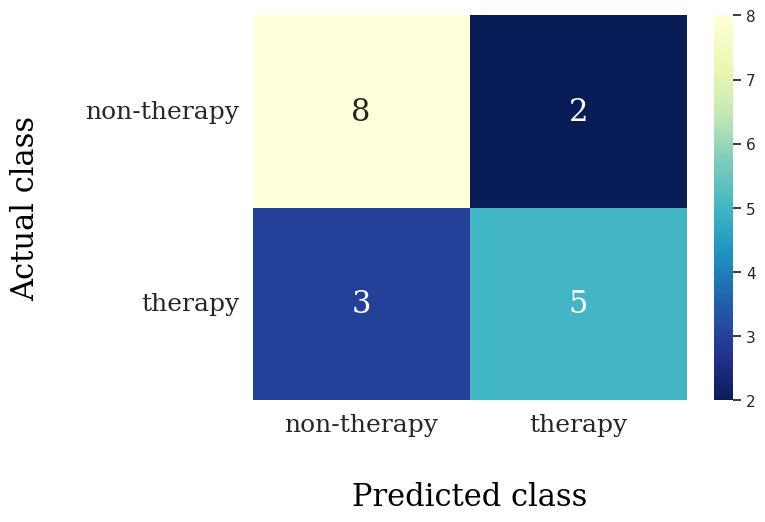

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv- Normalization

In [ ]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm


n_estimators = [100, 200, 400, 500]
max_depth = [5, 10, 15, 20, 25, 30]
#min_samples_split = [2, 5, 10, 15, 100]
forest = RandomForestClassifier(random_state = 1)
hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth} #, 'min_samples_split' : min_samples_split}
gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train_norm, y_train)
bestF_ = bestF.best_params_

forestOpt = RandomForestClassifier(random_state = 1, max_depth = bestF_['max_depth'], n_estimators = bestF_['n_estimators']) #, min_samples_split =bestF_['min_samples_split'])
modelOpt = forestOpt.fit(X_train_norm, y_train)

print(bestF_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'max_depth': 10, 'n_estimators': 200}


In [ ]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.671429,0.211034,"{'max_depth': 5, 'n_estimators': 100}"
1,0.685714,0.171627,"{'max_depth': 5, 'n_estimators': 200}"
2,0.685714,0.145920,"{'max_depth': 5, 'n_estimators': 400}"
3,0.685714,0.100903,"{'max_depth': 5, 'n_estimators': 500}"
4,0.654762,0.189955,"{'max_depth': 10, 'n_estimators': 100}"
5,0.688095,0.116375,"{'max_depth': 10, 'n_estimators': 200}"
6,0.685714,0.100903,"{'max_depth': 10, 'n_estimators': 400}"
7,0.685714,0.100903,"{'max_depth': 10, 'n_estimators': 500}"
8,0.654762,0.189955,"{'max_depth': 15, 'n_estimators': 100}"
9,0.688095,0.116375,"{'max_depth': 15, 'n_estimators': 200}"


In [ ]:
y_pred = modelOpt.predict(X_test_norm)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.41      0.88      0.56         8

    accuracy                           0.39        18
   macro avg       0.21      0.44      0.28        18
weighted avg       0.18      0.39      0.25        18

[[ 0 10]
 [ 1  7]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

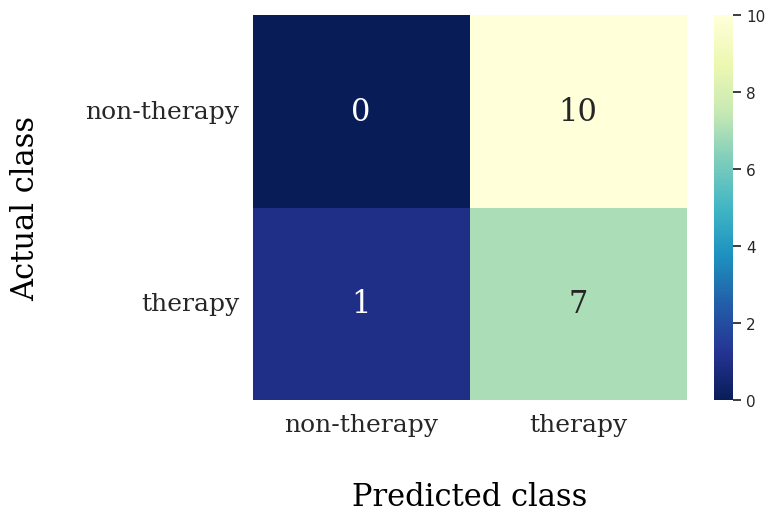

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

# 4️⃣ ML // SVM Classifier

## Mean fv

In [25]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

#Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']

svm= svm.SVC()
param_grid = {'gamma' : gammas, 'kernel' : kernels}
grid_search = GridSearchCV(svm, param_grid, cv=10)

SVM = grid_search.fit(X_train, y_train)

# examine the first result
print("**examine the first result","\n")

print(SVM.cv_results_['params'][0])
print(SVM.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = SVM.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")
bestS_ = SVM.best_params_
print(SVM.best_score_)
print(SVM.best_params_)
print(SVM.best_estimator_)

**examine the first result 

{'gamma': 0.001, 'kernel': 'linear'}
0.7

 **print the array of mean scores only 

[0.7        0.56190476 0.73571429 0.7        0.56190476 0.73571429
 0.7        0.56190476 0.73571429 0.7        0.56190476 0.73571429]

 **examine the best model 

0.7357142857142855
{'gamma': 0.001, 'kernel': 'poly'}
SVC(gamma=0.001, kernel='poly')


In [29]:
from sklearn import svm
svm= svm.SVC(random_state = 1, gamma = bestS_['gamma'], kernel = bestS_['kernel'])
modelOpt = svm.fit(X_train, y_train)


y_pred = modelOpt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.57      0.50      0.53         8

    accuracy                           0.61        18
   macro avg       0.60      0.60      0.60        18
weighted avg       0.61      0.61      0.61        18

[[7 3]
 [4 4]]


### SVM cass 1  gamma = 0.001, kernel = 'liner'

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [42]:
from sklearn import svm
svm= svm.SVC(random_state = 1, gamma = 0.001, kernel = 'linear')
modelOpt = svm.fit(X_train, y_train)


y_pred = modelOpt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.50      0.25      0.33         8

    accuracy                           0.56        18
   macro avg       0.54      0.53      0.50        18
weighted avg       0.54      0.56      0.52        18

[[8 2]
 [6 2]]


SVM cass 2 gamma = 0.01, kernel = 'liner'

In [48]:
from sklearn import svm
svm2= svm.SVC(random_state = 1, gamma = 0.01, kernel = 'linear')
modelOpt2 = svm2.fit(X_train, y_train)


y_pred2 = modelOpt2.predict(X_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.50      0.25      0.33         8

    accuracy                           0.56        18
   macro avg       0.54      0.53      0.50        18
weighted avg       0.54      0.56      0.52        18

[[8 2]
 [6 2]]


SVM cass 3 gamma = 0.1, kernel = 'liner'

In [49]:
from sklearn import svm
svm3= svm.SVC(random_state = 1, gamma = 0.1, kernel = 'linear')
modelOpt3 = svm3.fit(X_train, y_train)


y_pred3 = modelOpt3.predict(X_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.50      0.25      0.33         8

    accuracy                           0.56        18
   macro avg       0.54      0.53      0.50        18
weighted avg       0.54      0.56      0.52        18

[[8 2]
 [6 2]]


SVM cass 4 gamma = 1, kernel = 'liner'

In [50]:
from sklearn import svm
svm4= svm.SVC(random_state = 1, gamma = 1, kernel = 'linear')
modelOpt4 = svm4.fit(X_train, y_train)


y_pred4 = modelOpt4.predict(X_test)
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.50      0.25      0.33         8

    accuracy                           0.56        18
   macro avg       0.54      0.53      0.50        18
weighted avg       0.54      0.56      0.52        18

[[8 2]
 [6 2]]


SVM cass 5 gamma = 0.001, kernel = 'rbf'

In [52]:
from sklearn import svm
svm5= svm.SVC(random_state = 1, gamma = 0.001, kernel = 'rbf')
modelOpt5 = svm5.fit(X_train, y_train)


y_pred5 = modelOpt5.predict(X_test)
print(classification_report(y_test, y_pred5))
print(confusion_matrix(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       0.00      0.00      0.00         8

    accuracy                           0.56        18
   macro avg       0.28      0.50      0.36        18
weighted avg       0.31      0.56      0.40        18

[[10  0]
 [ 8  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM cass 6 gamma = 0.01, kernel = 'rbf'

In [53]:
from sklearn import svm
svm6= svm.SVC(random_state = 1, gamma = 0.01, kernel = 'rbf')
modelOpt6 = svm6.fit(X_train, y_train)


y_pred6 = modelOpt6.predict(X_test)
print(classification_report(y_test, y_pred6))
print(confusion_matrix(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       0.00      0.00      0.00         8

    accuracy                           0.56        18
   macro avg       0.28      0.50      0.36        18
weighted avg       0.31      0.56      0.40        18

[[10  0]
 [ 8  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM cass 7 gamma = 0.1, kernel = 'rbf'

In [55]:
from sklearn import svm
svm7= svm.SVC(random_state = 1, gamma = 0.1, kernel = 'rbf')
modelOpt7 = svm7.fit(X_train, y_train)


y_pred7 = modelOpt7.predict(X_test)
print(classification_report(y_test, y_pred7))
print(confusion_matrix(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       0.00      0.00      0.00         8

    accuracy                           0.56        18
   macro avg       0.28      0.50      0.36        18
weighted avg       0.31      0.56      0.40        18

[[10  0]
 [ 8  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM cass 8 gamma = 1, kernel = 'rbf'

In [57]:
from sklearn import svm
svm8= svm.SVC(random_state = 1, gamma = 1, kernel = 'rbf')
modelOpt8 = svm8.fit(X_train, y_train)


y_pred8 = modelOpt8.predict(X_test)
print(classification_report(y_test, y_pred8))
print(confusion_matrix(y_test, y_pred8))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       0.00      0.00      0.00         8

    accuracy                           0.56        18
   macro avg       0.28      0.50      0.36        18
weighted avg       0.31      0.56      0.40        18

[[10  0]
 [ 8  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM cass 9 gamma = 0.001, kernel = 'poly'

In [58]:
from sklearn import svm
svm9= svm.SVC(random_state = 1, gamma = 0.001, kernel = 'poly')
modelOpt9 = svm9.fit(X_train, y_train)


y_pred9 = modelOpt9.predict(X_test)
print(classification_report(y_test, y_pred9))
print(confusion_matrix(y_test, y_pred9))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.57      0.50      0.53         8

    accuracy                           0.61        18
   macro avg       0.60      0.60      0.60        18
weighted avg       0.61      0.61      0.61        18

[[7 3]
 [4 4]]


SVM cass 10 gamma = 0.01, kernel = 'poly'

In [59]:
from sklearn import svm
svm10= svm.SVC(random_state = 1, gamma = 0.01, kernel = 'poly')
modelOpt10 = svm10.fit(X_train, y_train)


y_pred10 = modelOpt10.predict(X_test)
print(classification_report(y_test, y_pred10))
print(confusion_matrix(y_test, y_pred10))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.57      0.50      0.53         8

    accuracy                           0.61        18
   macro avg       0.60      0.60      0.60        18
weighted avg       0.61      0.61      0.61        18

[[7 3]
 [4 4]]


SVM cass 11 gamma = 0.1, kernel = 'poly'

In [61]:
from sklearn import svm
svm11= svm.SVC(random_state = 1, gamma = 0.1, kernel = 'poly')
modelOpt11 = svm11.fit(X_train, y_train)


y_pred11 = modelOpt11.predict(X_test)
print(classification_report(y_test, y_pred11))
print(confusion_matrix(y_test, y_pred11))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.57      0.50      0.53         8

    accuracy                           0.61        18
   macro avg       0.60      0.60      0.60        18
weighted avg       0.61      0.61      0.61        18

[[7 3]
 [4 4]]


SVM cass 12 gamma = 1, kernel = 'poly'

In [62]:
from sklearn import svm
svm12= svm.SVC(random_state = 1, gamma = 1, kernel = 'poly')
modelOpt12 = svm12.fit(X_train, y_train)


y_pred12 = modelOpt12.predict(X_test)
print(classification_report(y_test, y_pred12))
print(confusion_matrix(y_test, y_pred12))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.57      0.50      0.53         8

    accuracy                           0.61        18
   macro avg       0.60      0.60      0.60        18
weighted avg       0.61      0.61      0.61        18

[[7 3]
 [4 4]]


In [ ]:
import ast
para = cv_results_rf_m['params'].tolist()

for i in range(len(para)):
  para_res = ast.literal_eval(para[i])
  print(f'\n ###### fine-tune of round {i}, para: {para_res} ###### \n' )

  forestOpt = RandomForestClassifier(random_state = 1, max_depth = para_res['max_depth'], n_estimators = para_res['n_estimators'], criterion = para_res['criterion'])
  print(forestOpt)
  modelOpt = forestOpt.fit(X_train, y_train)

  print(f'\n ###### fine-tune of round {i}, para: {para_res} ###### \n' )

  y_pred = modelOpt.predict(X_test)
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

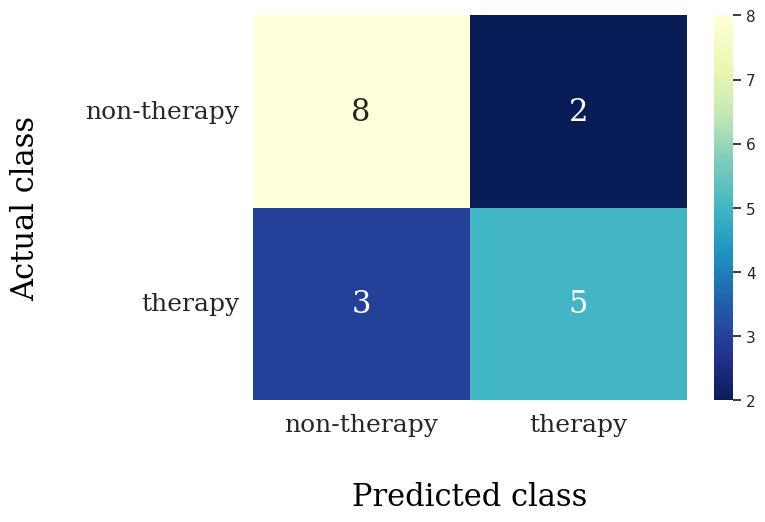

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv- Normalization

In [ ]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']

svm= svm.SVC()
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : kernels}
grid_search = GridSearchCV(svm, param_grid, cv=10)

SVM = grid_search.fit(X_train_norm, y_train)

# examine the first result
print("**examine the first result","\n")

print(SVM.cv_results_['params'][0])
print(SVM.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = SVM.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")
bestS_ = SVM.best_params_
print(SVM.best_score_)
print(SVM.best_params_)
print(SVM.best_estimator_)

**examine the first result 

{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
0.5619047619047619

 **print the array of mean scores only 

[0.56190476 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476
 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476
 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476
 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476
 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476
 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476
 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476
 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476
 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476
 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476]

 **examine the best model 

0.5619047619047619
{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
SVC(C=0.001, gamma=0.001, kernel='linear')


In [ ]:
from sklearn import svm
svm= svm.SVC(random_state = 1, C = bestS_['C'], gamma = bestS_['gamma'], kernel = bestS_['kernel'])
modelOpt = svm.fit(X_train_norm, y_train)

y_pred = modelOpt.predict(X_test_norm)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       0.00      0.00      0.00         8

    accuracy                           0.56        18
   macro avg       0.28      0.50      0.36        18
weighted avg       0.31      0.56      0.40        18

[[10  0]
 [ 8  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

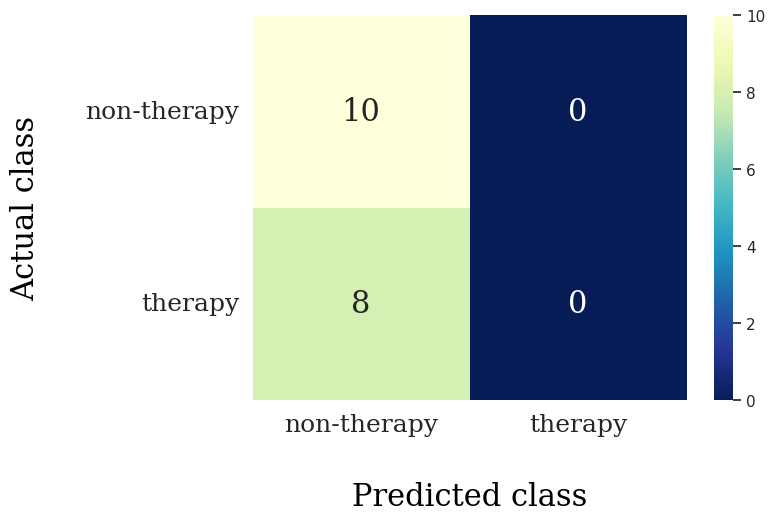

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)